<a href="https://colab.research.google.com/github/dorogao5/mathAnalysis/blob/main/%D0%BC%D0%B0%D1%82%D0%B0%D0%BD_%D0%BB%D0%B0%D0%B1%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 задание

Реализация метода дихотомии для функции  $f(x) = 2 \cos(0{,}5x) \cos(10{,}5x)$ на отрезке [0.1;0.5]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция
def f(x):
    # f(x) = 2*cos(0.5x)*cos(10.5x) = cos(11x) + cos(10x)
    return np.cos(11*x) + np.cos(10*x)

def dichotomy_method(a, b, eps=1e-5, delta=1e-6):
    iterations = []
    intervals = []
    delta = eps / 2
    while (b - a) > eps:
        x1 = (a + b - delta)/2
        x2 = (a + b + delta)/2
        iterations.append((x1, x2, (a + b)/2))
        intervals.append(b - a)

        if f(x1) <= f(x2):
            b = x2
        else:
            a = x1

    return (a + b) / 2, iterations, intervals

# Начальные параметры
a, b = 0.1, 0.5
eps = 1e-5

# Выполнение метода
minimum, history, intervals = dichotomy_method(a, b, eps)
print(f"Минимум функции: x = {minimum:.5f}, f(x) = {f(minimum):.5f}")


Минимум функции: x = 0.29852, f(x) = -1.97771


График с положением точек экстремума

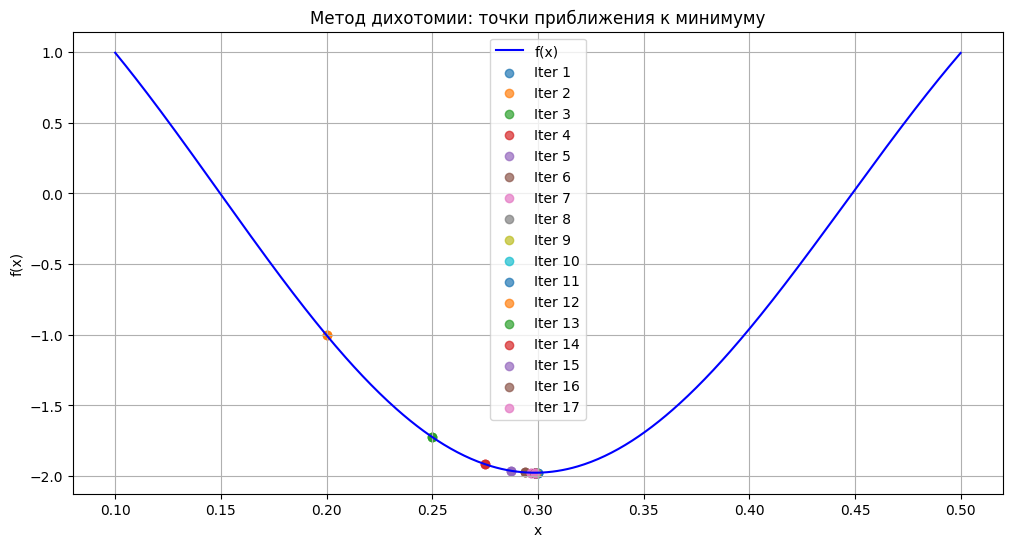

In [ ]:
x_vals = np.linspace(a, b, 500)
y_vals = f(x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, label="f(x)", color="blue")

# Добавим точки итераций
for i, (x1, x2, mid) in enumerate(history):
    plt.scatter([x1, x2, mid], [f(x1), f(x2), f(mid)], label=f"Iter {i+1}", alpha=0.7)

plt.title("Метод дихотомии: точки приближения к минимуму")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


График изменения длины интервала неопределённости

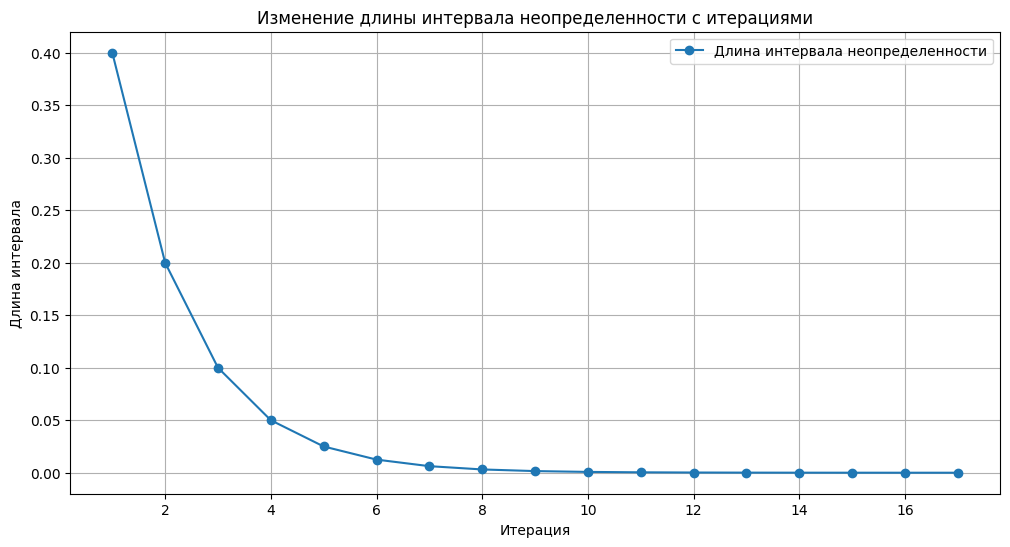

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(intervals)+1), intervals, marker="o", label="Длина интервала неопределенности")
plt.title("Изменение длины интервала неопределенности с итерациями")
plt.xlabel("Итерация")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid(True)
plt.show()

Пусть функция будет не унимодально на отрезке. Покажем, что тогда метод не будет работать конкретно. В качестве примера рассмотрим отрезок [0;10]

Минимум функции: x = 3.60919, f(x) = -0.45435


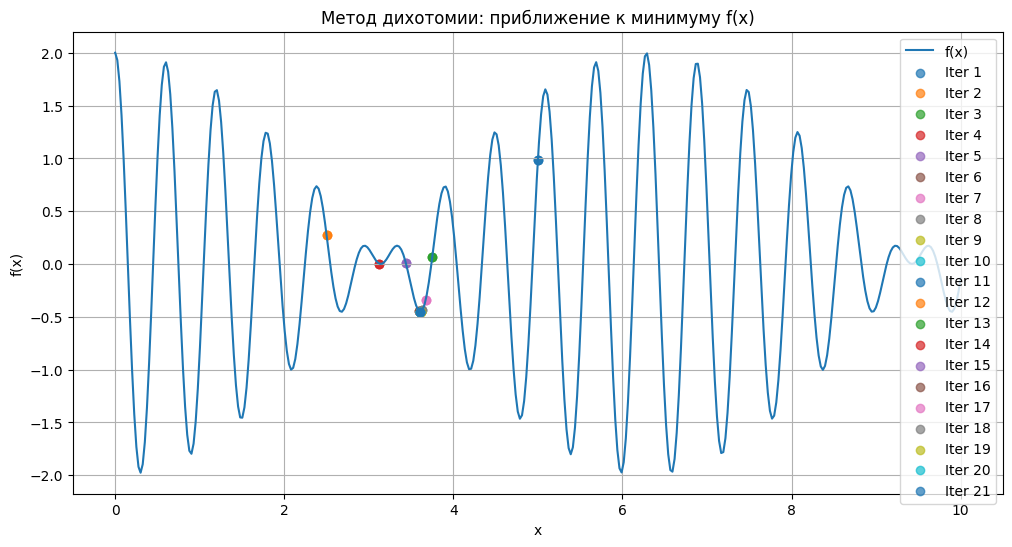

In [ ]:
# начальный отрезок [0, 10] и точность:
c, d = 0.0, 10.0
epsilon = 1e-5

minim, hist, interv = dichotomy_method(c, d, epsilon)
print(f"Минимум функции: x = {minim:.5f}, f(x) = {f(minim):.5f}")
x_vals = np.linspace(c, d, 400)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, label="f(x)")

# Отметим итерационные точки
for i, (x1, x2, mid) in enumerate(hist):
    plt.scatter([x1, x2, mid], [f(x1), f(x2), f(mid)], label=f"Iter {i+1}", alpha=0.7)

plt.title("Метод дихотомии: приближение к минимуму f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Второе задание

# Рассматриваем функцию:
- $y = \ln(x+52) \cdot \frac{1}{x^2 + 2}$

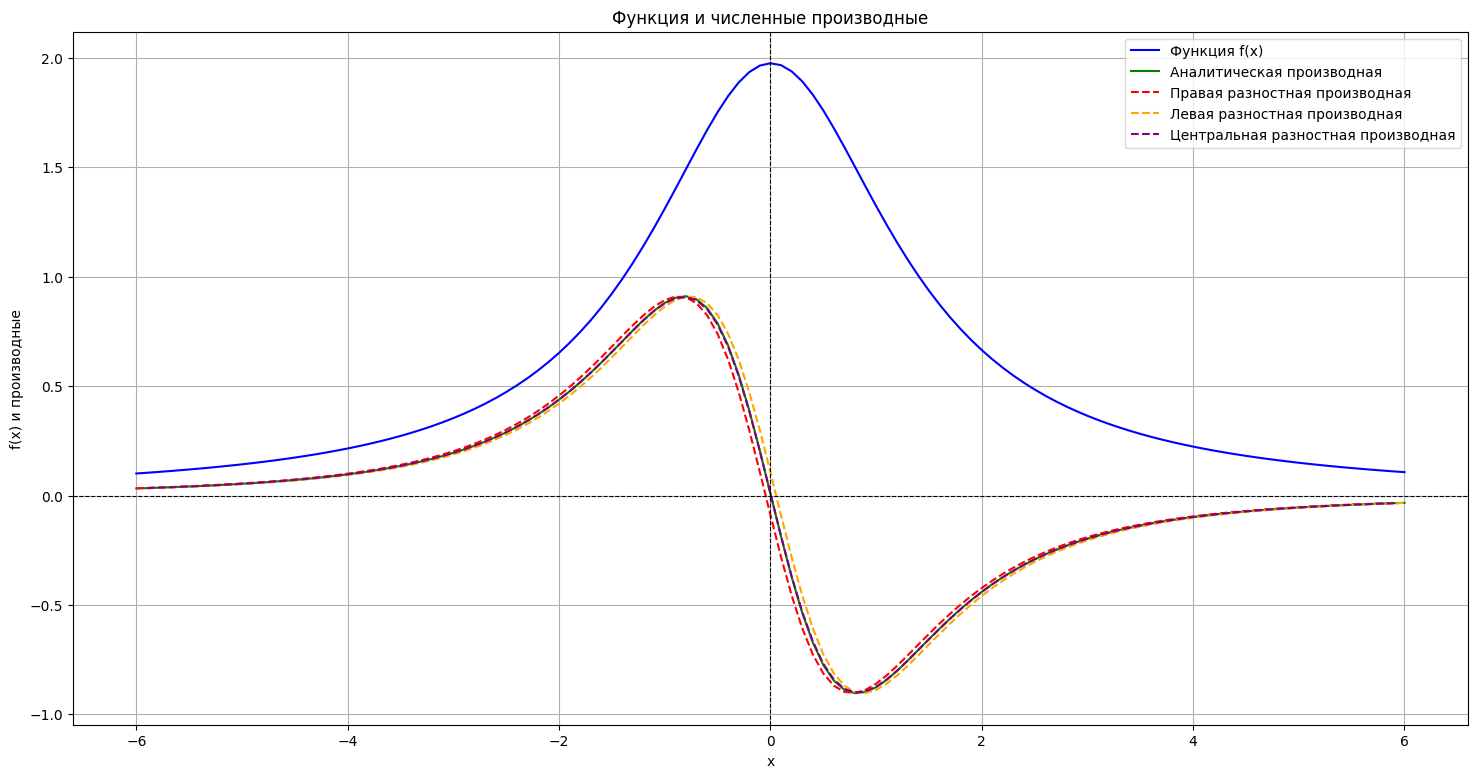

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.59993e-02, СКО (левая) = 2.59993e-02, СКО (центральная) = 1.68135e-03


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции
def f(x):
    return np.log(x + 52) / (x**2 + 2)

def f_analytical_derivative(x):
    return (1 / ((x + 52) * (x**2 + 2))) - (2 * x * np.log(x + 52) / (x**2 + 2)**2)

# Параметры
a, b = -6, 6
h = 0.1
x_values = np.arange(a, b + h, h)
std_results = []

# Значения функции
y_values = f(x_values)

# Численные производные
# Правая разностная производная
def right_difference(y_values, h):
    return (y_values[1:] - y_values[:-1]) / h

# Левая разностная производная
def left_difference(y_values, h):
    return (y_values[1:] - y_values[:-1]) / h

# Центральная разностная производная
def central_difference(y_values, h):
    return (y_values[2:] - y_values[:-2]) / (2 * h)

# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# Уменьшение $h$ в два раза

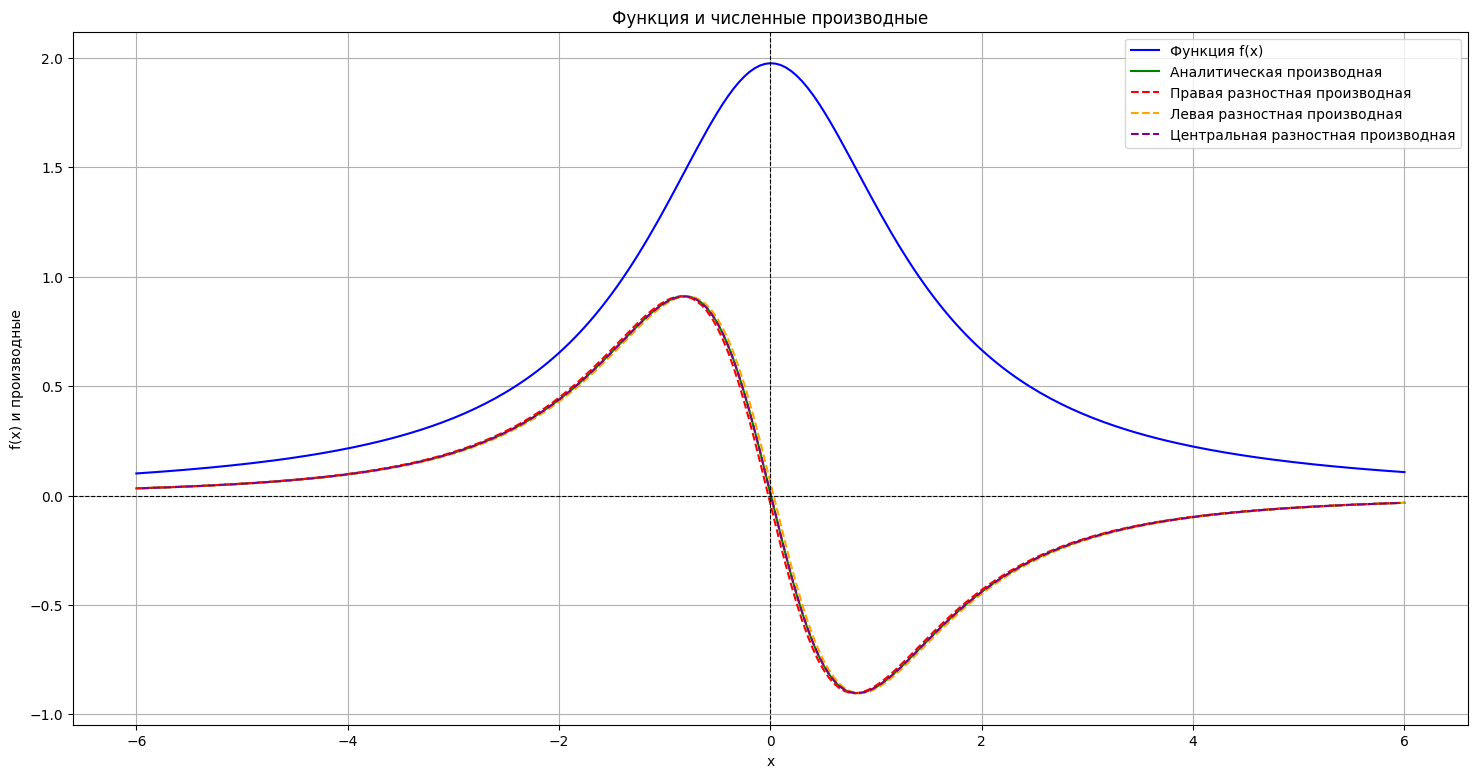

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.59993e-02, СКО (левая) = 2.59993e-02, СКО (центральная) = 1.68135e-03
h = 0.05000, СКО (правая) = 1.30098e-02, СКО (левая) = 1.30098e-02, СКО (центральная) = 4.20558e-04


In [ ]:
# Параметр h
h = 0.05
x_values = np.arange(a, b + h, h)
# Значения функции
y_values = f(x_values)


# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# Уменьшение $h$ в четыре раза

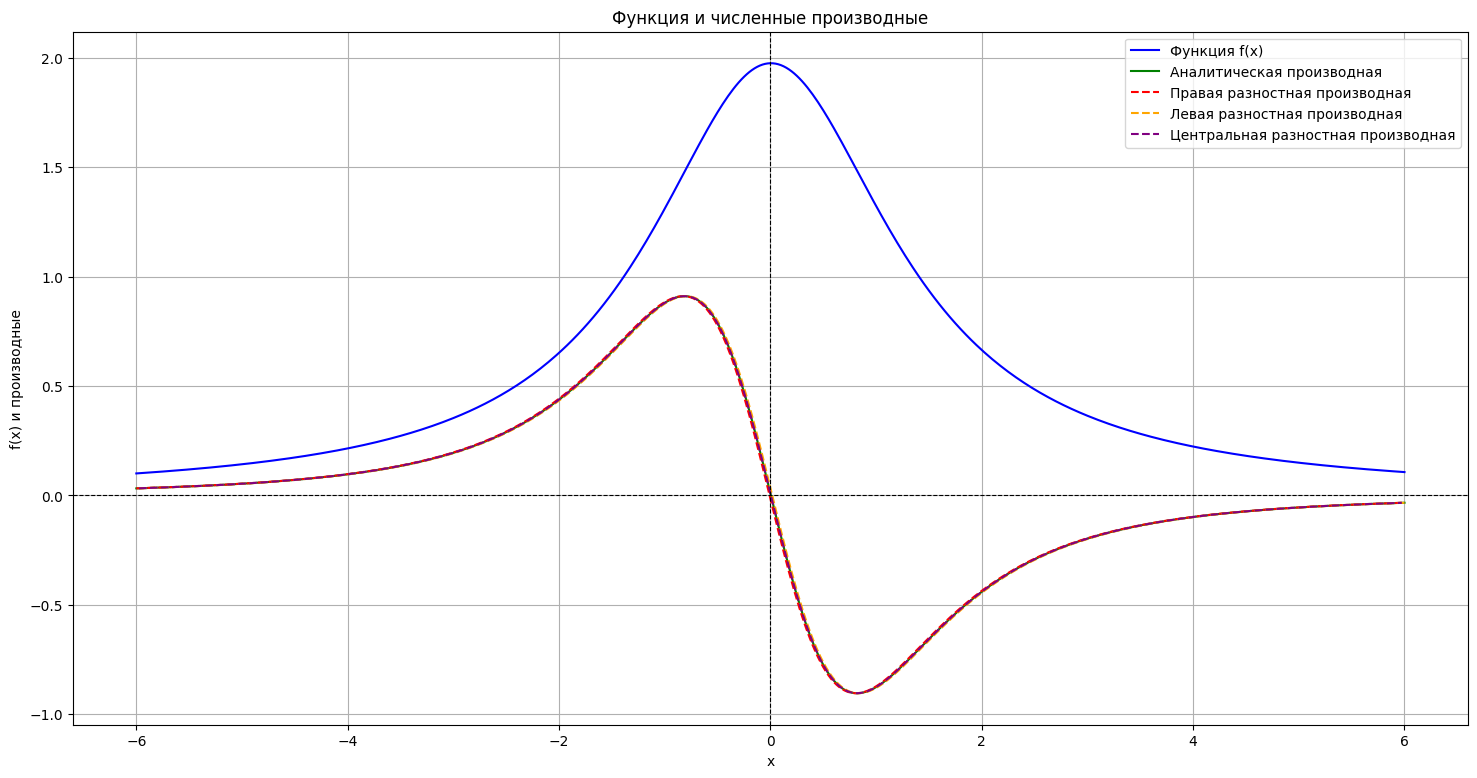

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.59993e-02, СКО (левая) = 2.59993e-02, СКО (центральная) = 1.68135e-03
h = 0.05000, СКО (правая) = 1.30098e-02, СКО (левая) = 1.30098e-02, СКО (центральная) = 4.20558e-04
h = 0.02500, СКО (правая) = 6.50618e-03, СКО (левая) = 6.50618e-03, СКО (центральная) = 1.05099e-04


In [ ]:
# Параметр h
h = 0.025
x_values = np.arange(a, b + h, h)
# Значения функции
y_values = f(x_values)


# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# Уменьшение $h$ в восемь раз

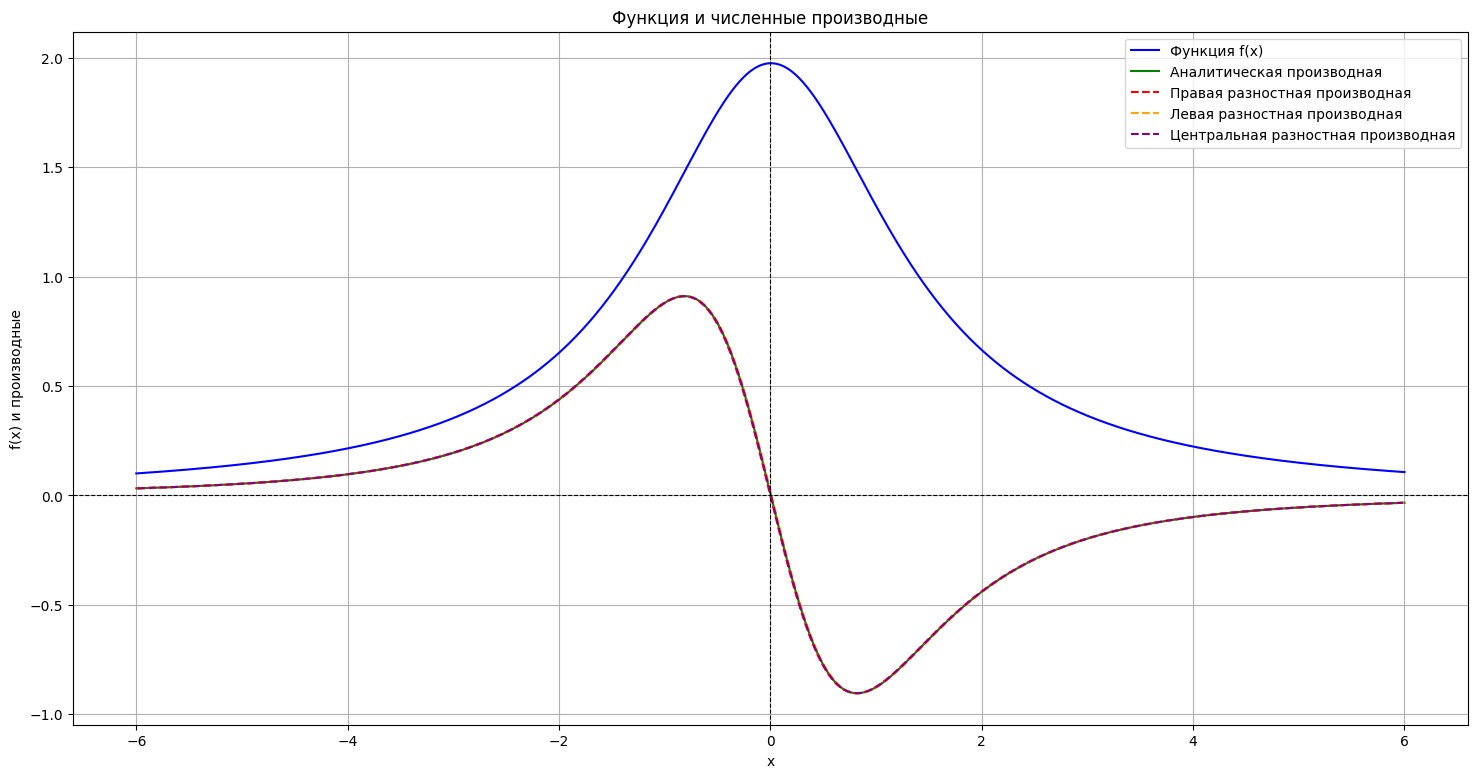

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.59993e-02, СКО (левая) = 2.59993e-02, СКО (центральная) = 1.68135e-03
h = 0.05000, СКО (правая) = 1.30098e-02, СКО (левая) = 1.30098e-02, СКО (центральная) = 4.20558e-04
h = 0.02500, СКО (правая) = 6.50618e-03, СКО (левая) = 6.50618e-03, СКО (центральная) = 1.05099e-04
h = 0.01250, СКО (правая) = 3.25325e-03, СКО (левая) = 3.25325e-03, СКО (центральная) = 2.62653e-05


In [ ]:
# Параметр h
h = 0.0125
x_values = np.arange(a, b + h, h)
# Значения функции
y_values = f(x_values)


# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# Уменьшение $h$ в шестнадцать раз

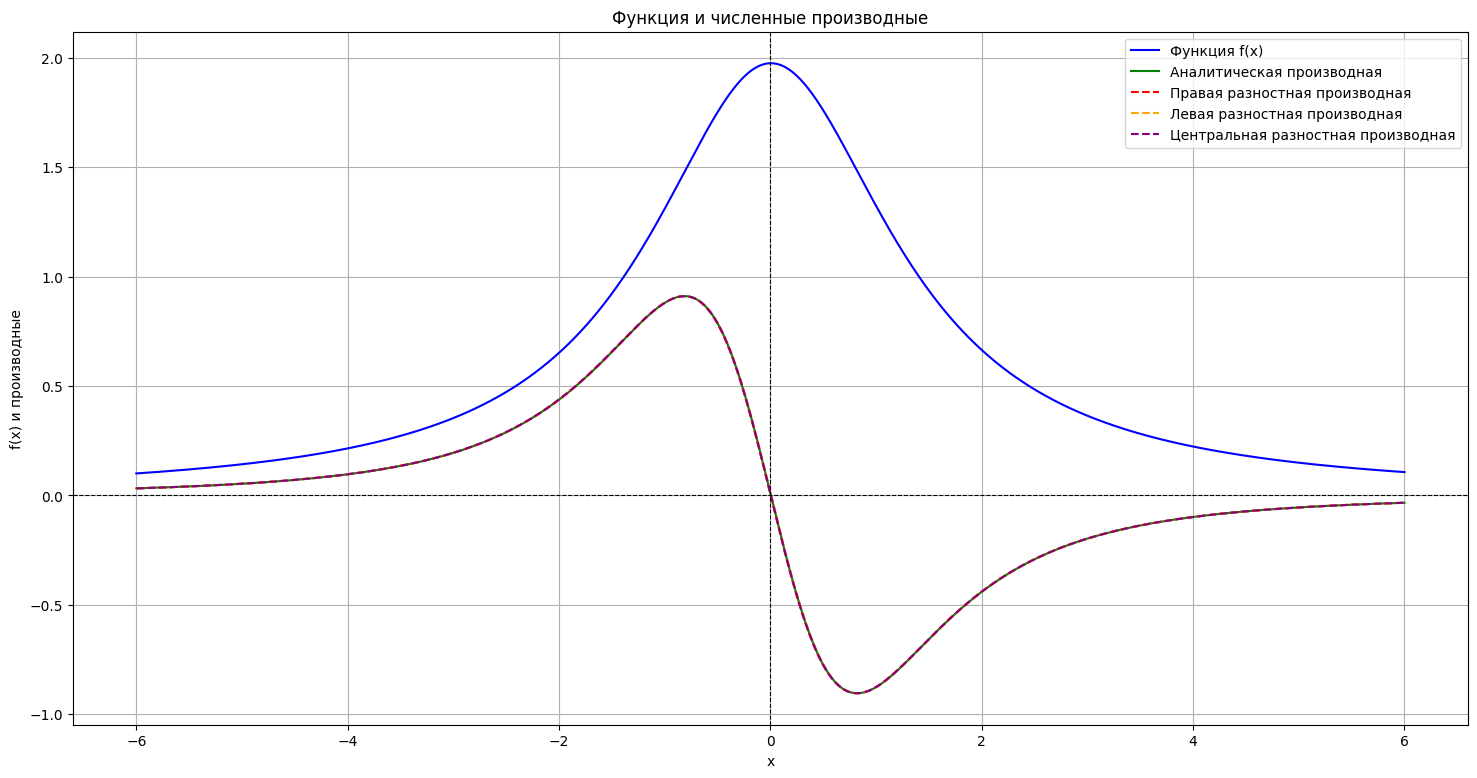

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.59993e-02, СКО (левая) = 2.59993e-02, СКО (центральная) = 1.68135e-03
h = 0.05000, СКО (правая) = 1.30098e-02, СКО (левая) = 1.30098e-02, СКО (центральная) = 4.20558e-04
h = 0.02500, СКО (правая) = 6.50618e-03, СКО (левая) = 6.50618e-03, СКО (центральная) = 1.05099e-04
h = 0.01250, СКО (правая) = 3.25325e-03, СКО (левая) = 3.25325e-03, СКО (центральная) = 2.62653e-05
h = 0.00625, СКО (правая) = 1.62664e-03, СКО (левая) = 1.62664e-03, СКО (центральная) = 6.56488e-06


In [ ]:
# Параметр h
h = 0.00625
x_values = np.arange(a, b + h, h)
# Значения функции
y_values = f(x_values)


# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# График зависимости среднеквадратичного отклонения от величины шага

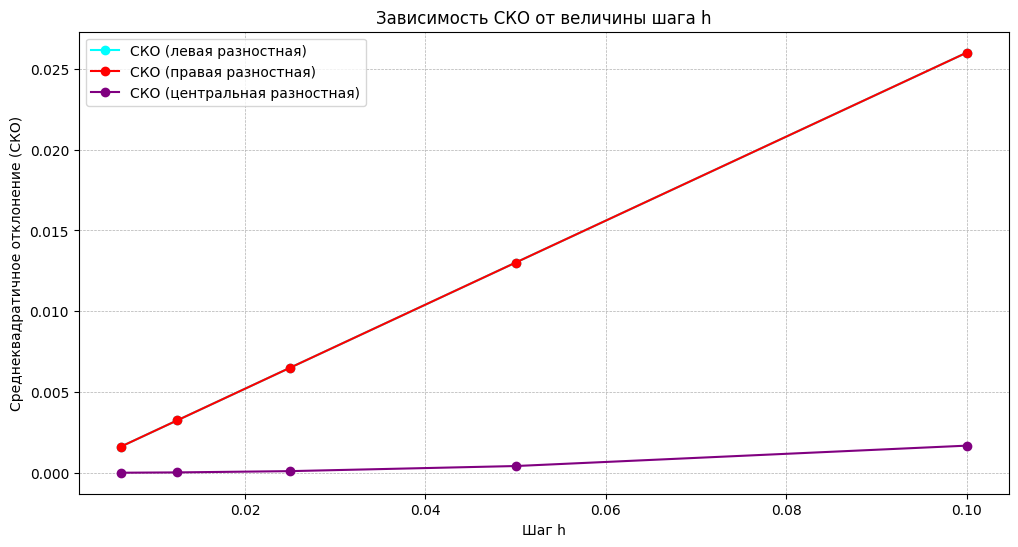

In [ ]:
# Построение графика зависимости СКО от h
h_values, std_right_values, std_left_values, std_central_values = zip(*std_results)
plt.figure(figsize=(12, 6))
plt.plot(h_values, std_left_values, label="СКО (левая разностная)", marker='o', color="cyan")
plt.plot(h_values, std_right_values, label="СКО (правая разностная)", marker='o', color="red")
plt.plot(h_values, std_central_values, label="СКО (центральная разностная)", marker='o', color="purple")

plt.title("Зависимость СКО от величины шага h")
plt.xlabel("Шаг h")
plt.ylabel("Среднеквадратичное отклонение (СКО)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

СКО левой и правой производных полностью совпадают, поэтому СКО левой не видно на графике, но его наличие можно легко проверить закомментировав строчку с графиком правой производной


# Рассматриваем функцию:
- $y = e^{\cos(x)} \cdot \sin(2x)$

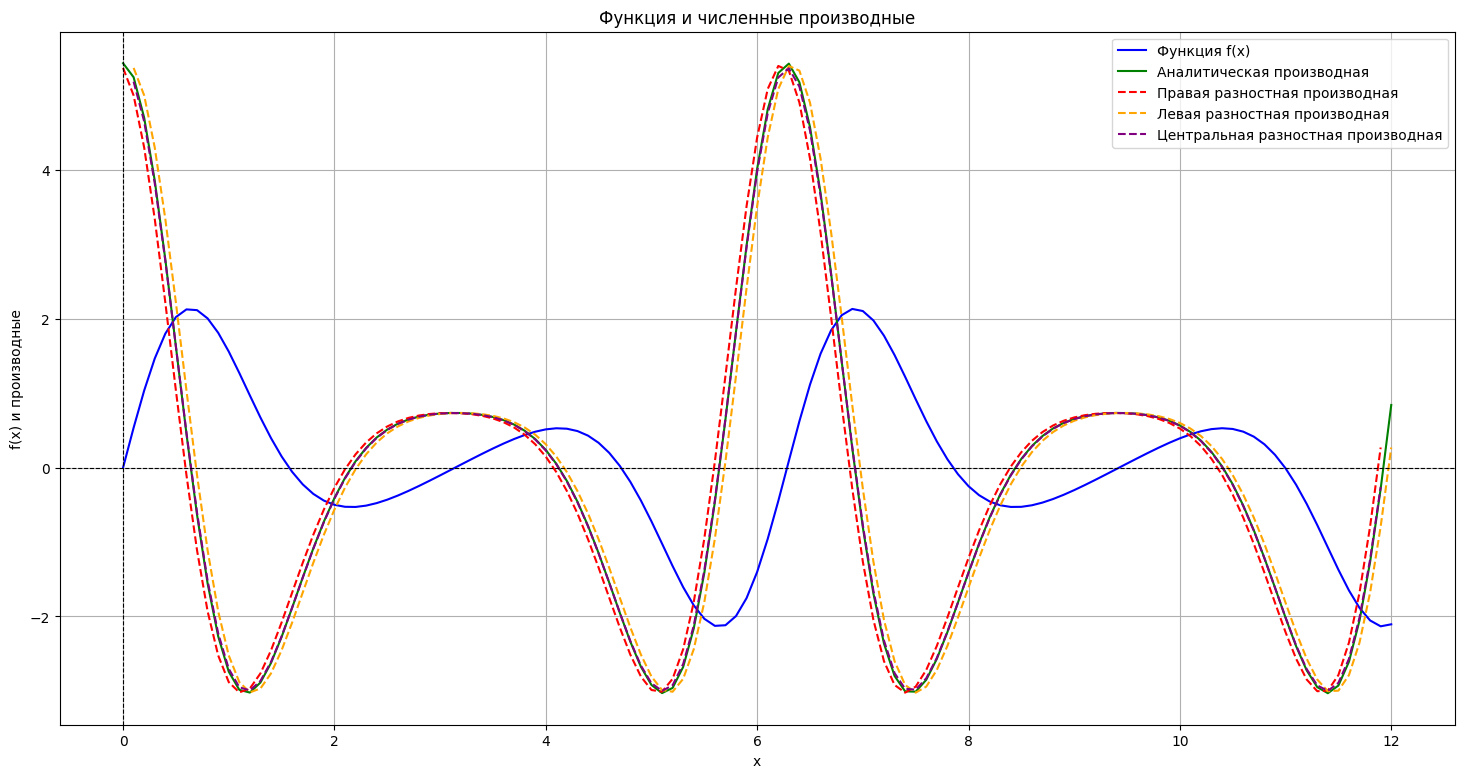

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.52436e-01, СКО (левая) = 2.54456e-01, СКО (центральная) = 2.24911e-02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции
def f(x):
    return np.e**np.cos(x) * np.sin(2*x)

def f_analytical_derivative(x):
    return np.exp(np.cos(x)) * (-np.sin(x) * np.sin(2 * x) + 2 * np.cos(2 * x))

# Параметры
a, b = 0, 12
h = 0.1
x_values = np.arange(a, b + h, h)
std_results = []

# Значения функции
y_values = f(x_values)

# Численные производные
# Правая разностная производная
def right_difference(y_values, h):
    return (y_values[1:] - y_values[:-1]) / h

# Левая разностная производная
def left_difference(y_values, h):
    return (y_values[1:] - y_values[:-1]) / h

# Центральная разностная производная
def central_difference(y_values, h):
    return (y_values[2:] - y_values[:-2]) / (2 * h)

# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# Уменьшение $h$ в два раза

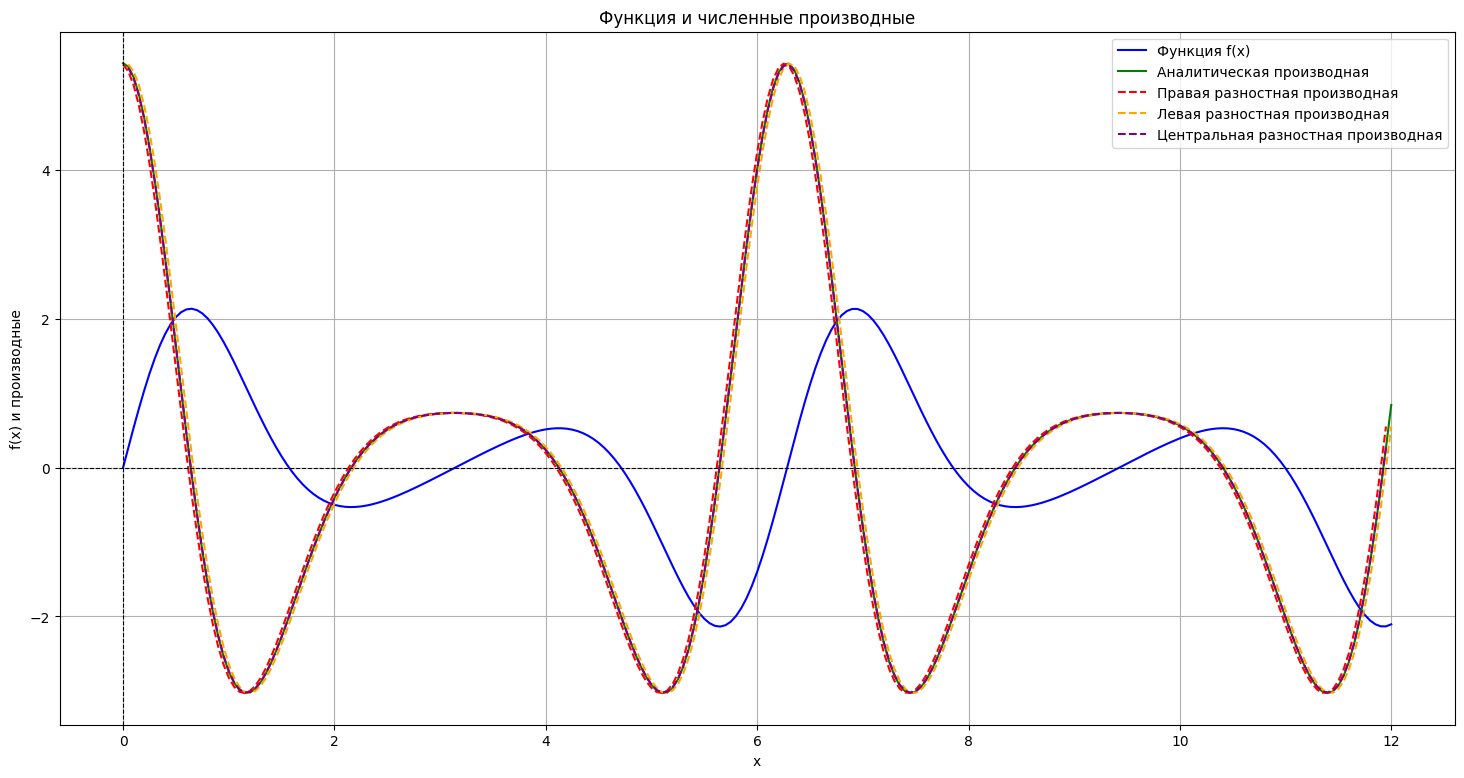

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.52436e-01, СКО (левая) = 2.54456e-01, СКО (центральная) = 2.24911e-02
h = 0.05000, СКО (правая) = 1.26668e-01, СКО (левая) = 1.27169e-01, СКО (центральная) = 5.68099e-03


In [ ]:
# Параметр h
h = 0.05
x_values = np.arange(a, b + h, h)
# Значения функции
y_values = f(x_values)


# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# Уменьшение $h$ в четыре раза

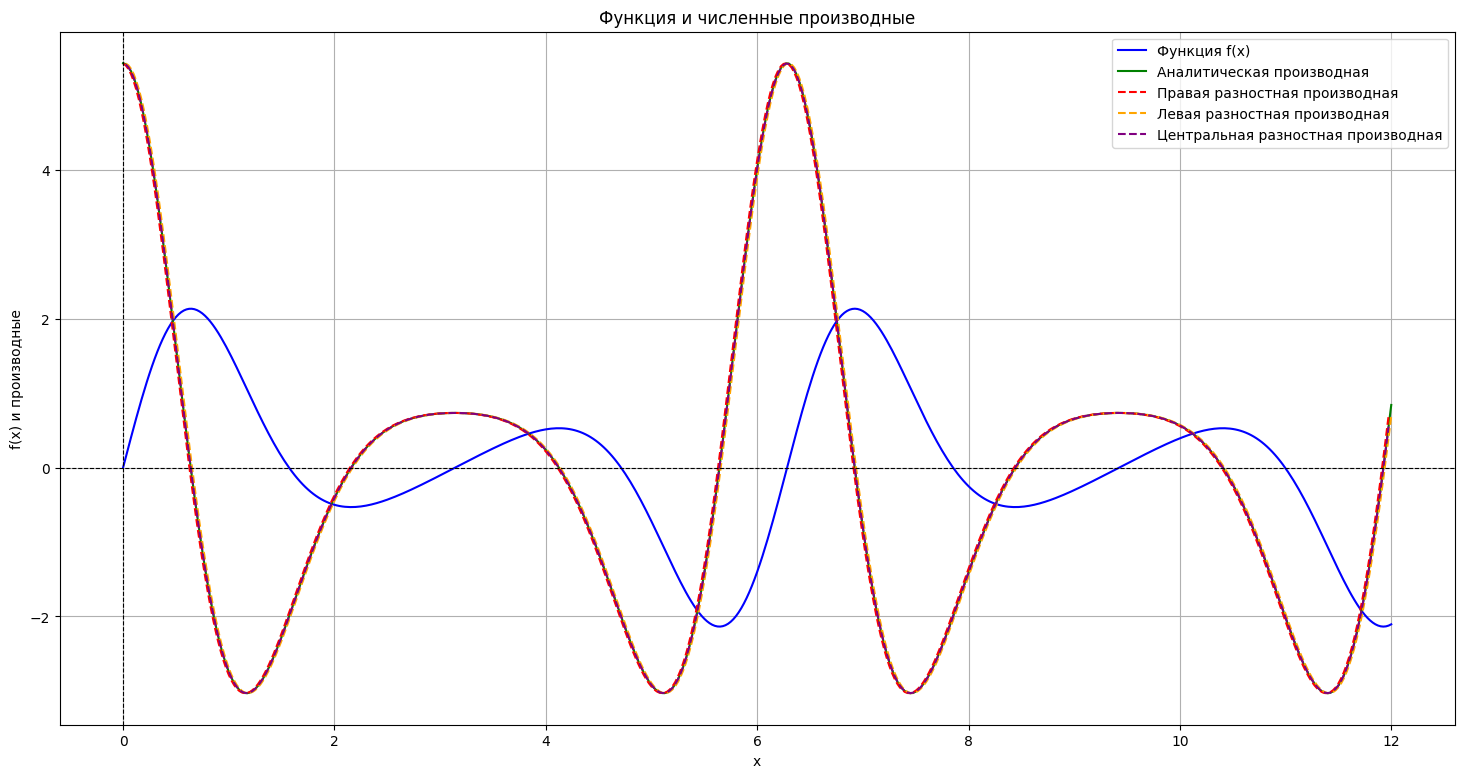

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.52436e-01, СКО (левая) = 2.54456e-01, СКО (центральная) = 2.24911e-02
h = 0.05000, СКО (правая) = 1.26668e-01, СКО (левая) = 1.27169e-01, СКО (центральная) = 5.68099e-03
h = 0.02500, СКО (правая) = 6.34212e-02, СКО (левая) = 6.35462e-02, СКО (центральная) = 1.42622e-03


In [ ]:
# Параметр h
h = 0.025
x_values = np.arange(a, b + h, h)
# Значения функции
y_values = f(x_values)


# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# Уменьшение $h$ в восемь раз

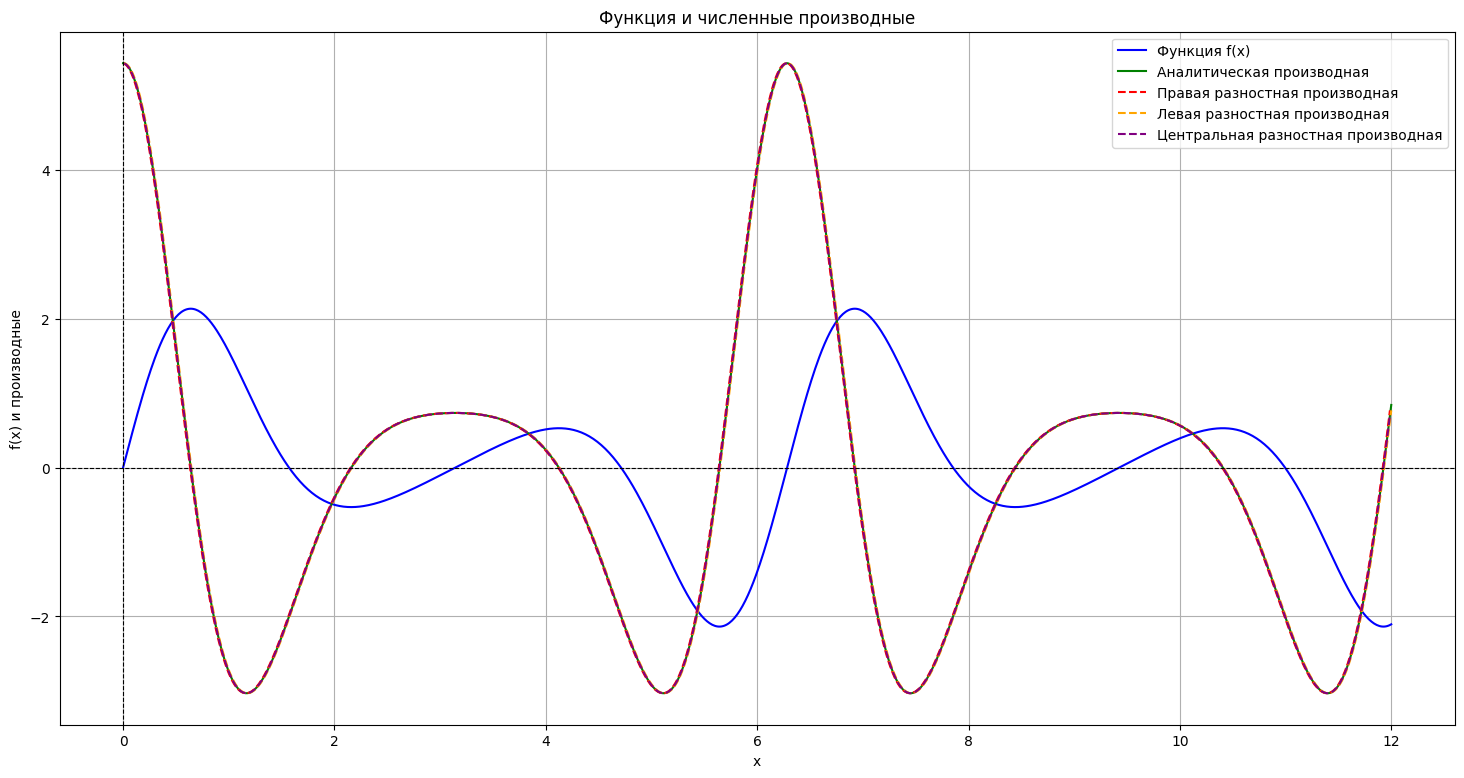

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.52436e-01, СКО (левая) = 2.54456e-01, СКО (центральная) = 2.24911e-02
h = 0.05000, СКО (правая) = 1.26668e-01, СКО (левая) = 1.27169e-01, СКО (центральная) = 5.68099e-03
h = 0.02500, СКО (правая) = 6.34212e-02, СКО (левая) = 6.35462e-02, СКО (центральная) = 1.42622e-03
h = 0.01250, СКО (правая) = 3.17293e-02, СКО (левая) = 3.17605e-02, СКО (центральная) = 3.57217e-04


In [ ]:
# Параметр h
h = 0.0125
x_values = np.arange(a, b + h, h)
# Значения функции
y_values = f(x_values)


# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# Уменьшение $h$ в шестнадцать раз

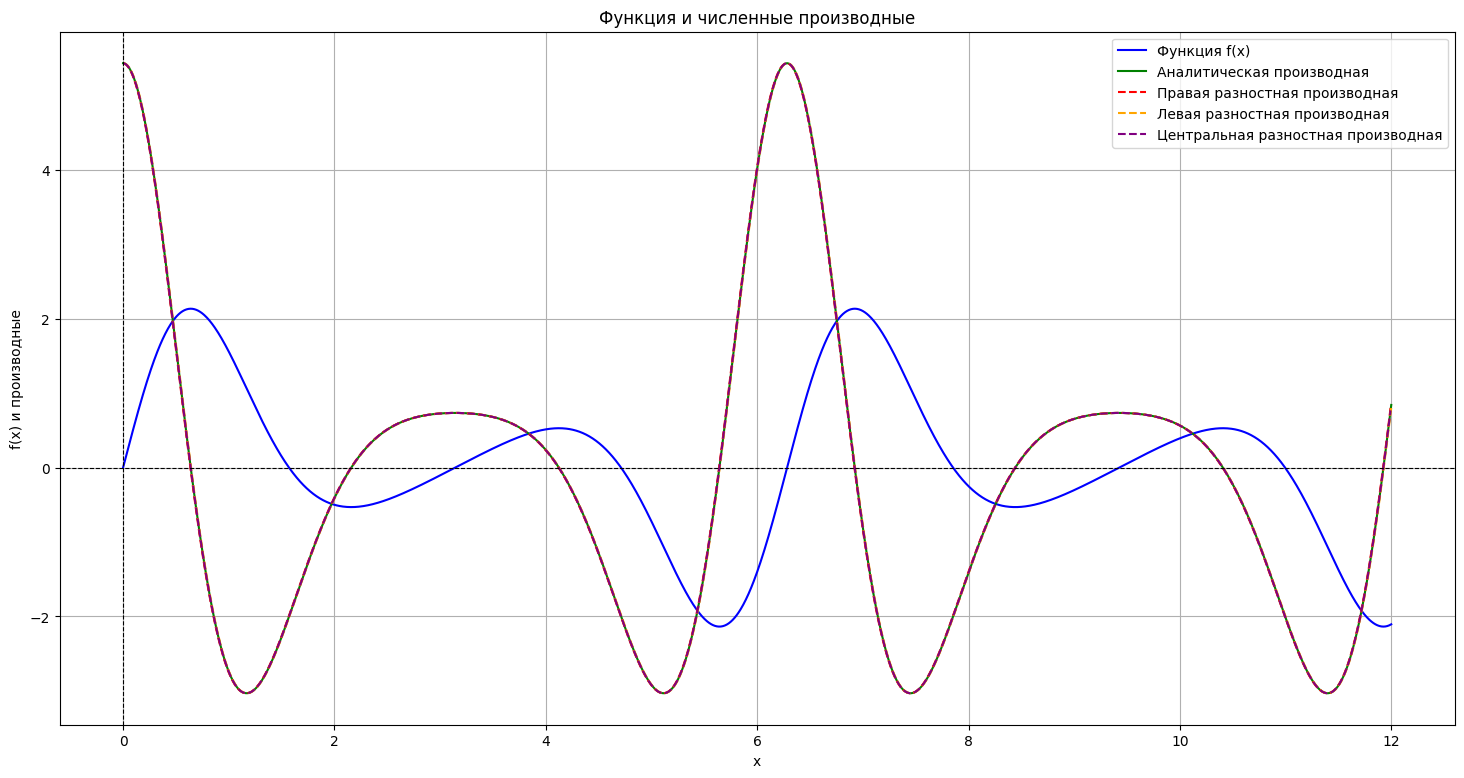

Результаты СКО для различных значений h:
h = 0.10000, СКО (правая) = 2.52436e-01, СКО (левая) = 2.54456e-01, СКО (центральная) = 2.24911e-02
h = 0.05000, СКО (правая) = 1.26668e-01, СКО (левая) = 1.27169e-01, СКО (центральная) = 5.68099e-03
h = 0.02500, СКО (правая) = 6.34212e-02, СКО (левая) = 6.35462e-02, СКО (центральная) = 1.42622e-03
h = 0.01250, СКО (правая) = 3.17293e-02, СКО (левая) = 3.17605e-02, СКО (центральная) = 3.57217e-04
h = 0.00625, СКО (правая) = 1.58689e-02, СКО (левая) = 1.58767e-02, СКО (центральная) = 8.93819e-05


In [ ]:
# Параметр h
h = 0.00625
x_values = np.arange(a, b + h, h)
# Значения функции
y_values = f(x_values)


# Граничные производные
boundary_start = (-3 * y_values[0] + 4 * y_values[1] - y_values[2]) / (2 * h)
boundary_end = (3 * y_values[-1] - 4 * y_values[-2] + y_values[-3]) / (2 * h)

# Вычисление производных
right_diff = np.append(right_difference(y_values, h), np.nan)
left_diff = np.insert(left_difference(y_values, h), 0, np.nan)
central_diff = np.concatenate(([np.nan], central_difference(y_values, h), [np.nan]))

# Аналитические значения производной
true_derivatives = f_analytical_derivative(x_values)

# Вычисление СКО
std_right = np.nanstd(right_diff - true_derivatives)
std_left = np.nanstd(left_diff - true_derivatives)
std_central = np.nanstd(central_diff - true_derivatives)
std_results.append((h, std_right, std_left, std_central))
# Построение графика
plt.figure(figsize=(18, 9))

# График функции
plt.plot(x_values, y_values, label="Функция f(x)", color="blue")
plt.plot(x_values, true_derivatives, label="Аналитическая производная", color="green")
plt.plot(x_values, right_diff, label="Правая разностная производная", linestyle='--', color="red")
plt.plot(x_values, left_diff, label="Левая разностная производная", linestyle='--', color="orange")
plt.plot(x_values, central_diff, label="Центральная разностная производная", linestyle='--', color="purple")

# Добавление подписей, легенды, заголовка и выделение осей
plt.title("Функция и численные производные")
plt.xlabel("x")
plt.ylabel("f(x) и производные")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()
print("Результаты СКО для различных значений h:")
for result in std_results:
    print(f"h = {result[0]:.5f}, СКО (правая) = {result[1]:.5e}, СКО (левая) = {result[2]:.5e}, СКО (центральная) = {result[3]:.5e}")


# График зависимости среднеквадратичного отклонения от величины шага

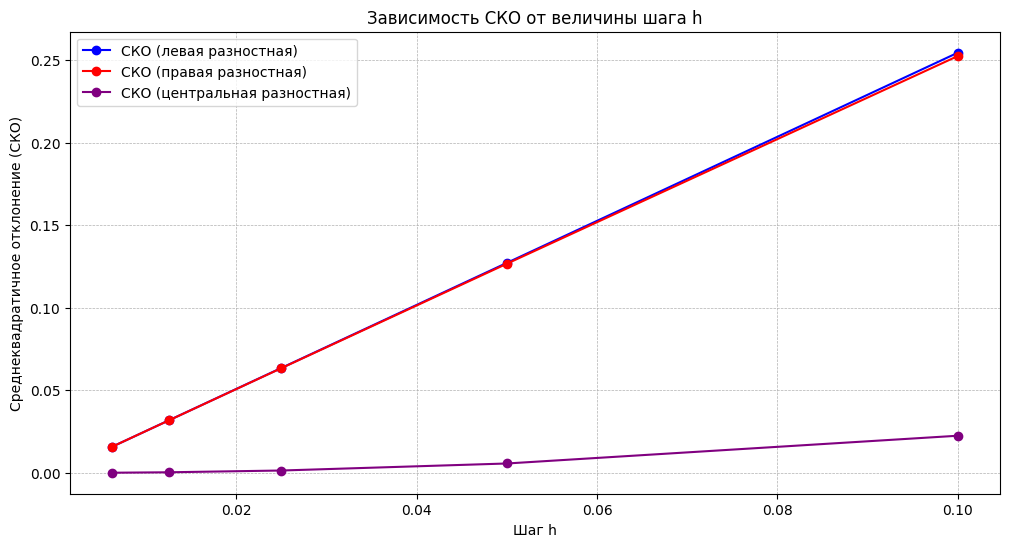

In [ ]:
# Построение графика зависимости СКО от h
h_values, std_right_values, std_left_values, std_central_values = zip(*std_results)
plt.figure(figsize=(12, 6))
plt.plot(h_values, std_left_values, label="СКО (левая разностная)", marker='o', color="blue")
plt.plot(h_values, std_right_values, label="СКО (правая разностная)", marker='o', color="red")
plt.plot(h_values, std_central_values, label="СКО (центральная разностная)", marker='o', color="purple")

plt.title("Зависимость СКО от величины шага h")
plt.xlabel("Шаг h")
plt.ylabel("Среднеквадратичное отклонение (СКО)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()